In [28]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

# Data Import

In [29]:
#Sourcefile: https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/

In [30]:
df = pd.read_csv(r'C:\Users\PRM\Documents\Projects\Python\COVID/covid_confirmed_usafacts.csv')

In [31]:
df = df[df['State']=='FL'] #confirmed

In [32]:
df.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2021-10-20,2021-10-21,2021-10-22,2021-10-23,2021-10-24,2021-10-25,2021-10-26,2021-10-27,2021-10-28,2021-10-29
329,0,Statewide Unallocated,FL,12,0,0,0,0,0,0,...,14466,16472,3017,3205,4155,6179,6179,6179,3017,3017
330,12001,Alachua County,FL,12,0,0,0,0,0,0,...,39153,39153,39360,39360,39360,39360,39360,39360,39540,39540
331,12003,Baker County,FL,12,0,0,0,0,0,0,...,5960,5960,5970,5970,5970,5970,5970,5970,5972,5972
332,12005,Bay County,FL,12,0,0,0,0,0,0,...,31587,31587,31688,31688,31688,31688,31688,31688,31780,31780
333,12007,Bradford County,FL,12,0,0,0,0,0,0,...,5319,5319,5327,5327,5327,5327,5327,5327,5335,5335


In [33]:
df = df[df['State']=='FL'] #population

In [34]:
df['countyFIPS'] = df['countyFIPS'].replace('.0', '').astype(object)
df['StateFIPS'] = df['StateFIPS'].replace('.0', '').astype(object)

# Data Manipulation/Cleansing

In [35]:
df = df[df['State']=='FL']
df = df[df['County Name']!='Statewide Unallocated']

In [36]:
df = df.melt(id_vars=['countyFIPS',
                 'County Name',
                 'State',
                 'StateFIPS'], 
        var_name="Date", 
        value_name="Confirmed Cases")

In [37]:
df['Confirmed Cases'] = df['Confirmed Cases'].astype(int)
df['Confirmed Cases'] = df['Confirmed Cases'].astype(int)
df['Confirmed Cases'] = df['Confirmed Cases'].astype(int)

In [38]:
df['Date'] = pd.to_datetime(df['Date'])

In [39]:
df.dtypes

countyFIPS                 object
County Name                object
State                      object
StateFIPS                  object
Date               datetime64[ns]
Confirmed Cases             int32
dtype: object

In [40]:
df['Month'] =df['Date'].dt.month_name(locale = 'English')

# Exploratory Data Analysis

Text(0.5, 1.0, 'Confirmed Cases ')

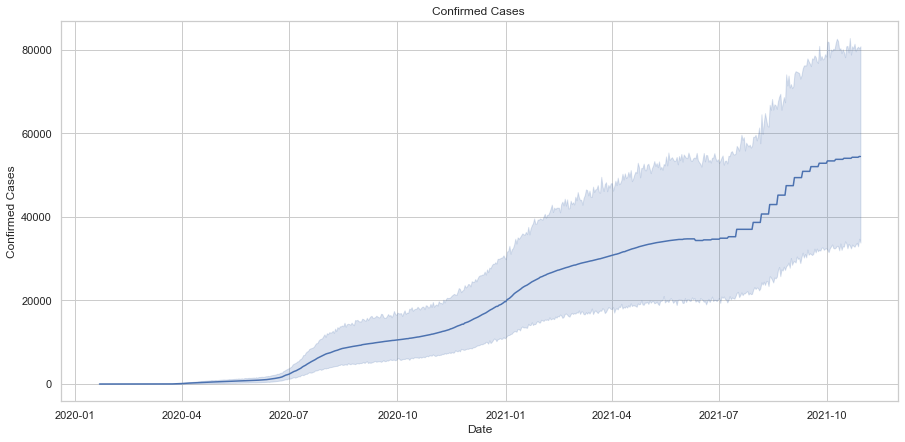

In [41]:
plt.figure(figsize=(15,7))
ax = sns.lineplot(x='Date', y="Confirmed Cases", data=df)
ax.set_title('Confirmed Cases ')

In [42]:
df

,countyFIPS,County Name,State,StateFIPS,Date,Confirmed Cases,Month
0,12001,Alachua County,FL,12,2020-01-22,0,January
1,12003,Baker County,FL,12,2020-01-22,0,January
2,12005,Bay County,FL,12,2020-01-22,0,January
3,12007,Bradford County,FL,12,2020-01-22,0,January
4,12009,Brevard County,FL,12,2020-01-22,0,January
...,...,...,...,...,...,...,...
43344,12125,Union County,FL,12,2021-10-29,3061,October
43345,12127,Volusia County,FL,12,2021-10-29,75711,October
43346,12129,Wakulla County,FL,12,2021-10-29,6404,October
43347,12131,Walton County,FL,12,2021-10-29,11936,October
